In [1]:
pip install facenet-pytorch

     |████████████████████████████████| 1.9MB 29kB/s 


In [0]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 



workers = 0 if os.name == 'nt' else 4


In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Running on device: {}'.format(device))

Running on device: cuda:0


In [0]:
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=20,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, prewhiten=True,
    device=device
)

In [5]:
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [164]:
def collate_fn(x):
    return x[0]

dataset = datasets.ImageFolder('/content/drive/My Drive/Colab_Notebooks/Resources/facialRecognition/data_teste_joao/mesma_pessoa/')
print(dataset)
dataset.idx_to_class = {i:c for c, i in dataset.class_to_idx.items()}
display(dataset.idx_to_class)
loader = DataLoader(dataset, collate_fn=collate_fn, num_workers=workers)
display(dataset)

Dataset ImageFolder
    Number of datapoints: 2
    Root location: /content/drive/My Drive/Colab_Notebooks/Resources/facialRecognition/data_teste_joao/mesma_pessoa/


{0: '1', 1: '2'}

Dataset ImageFolder
    Number of datapoints: 2
    Root location: /content/drive/My Drive/Colab_Notebooks/Resources/facialRecognition/data_teste_joao/mesma_pessoa/

Face detected with probability: 0.999771
Face detected with probability: 0.999999
Face detected with probability: 0.999748
Face detected with probability: 0.999681
Face detected with probability: 0.999997
1
2
3
4
5


<Figure size 1080x1080 with 0 Axes>

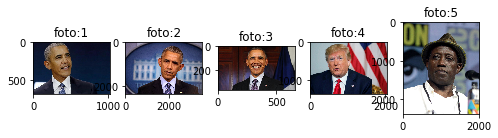

,Foto1,Foto2,Foto3,Foto4,Foto5
Foto1,0.000000,0.722951,0.500982,1.411875,1.270505
Foto2,0.722951,0.000000,0.738127,1.161524,1.219487
Foto3,0.500982,0.738127,0.000000,1.341842,1.135802
Foto4,1.411875,1.161524,1.341842,0.000000,1.250800
Foto5,1.270505,1.219487,1.135802,1.250800,0.000000


In [211]:
import requests
from PIL import Image
import PIL.ImageOps



imagensObama = []
response = requests.get('https://www.estudarfora.org.br/app/uploads/2018/03/Obama-lan%C3%A7a-programa-de-bolsas-1024x683.jpg',stream = True)  
imagensObama.append(Image.open(response.raw))
response = requests.get('https://arc-anglerfish-arc2-prod-bostonglobe.s3.amazonaws.com/public/XVMCFHWNCQI6NNDVGPJ2GYUKZ4.jpg',stream = True)  
imagensObama.append(Image.open(response.raw))
response = requests.get('https://ichef.bbci.co.uk/news/660/cpsprodpb/E225/production/_93339875_obamalaughing.jpg',stream = True)  
imagensObama.append(Image.open(response.raw))
response = requests.get('https://imagens.publico.pt/imagens.aspx/1387875?tp=UH&db=IMAGENS&type=JPG',stream = True)  
imagensObama.append(Image.open(response.raw))
response = requests.get('https://upload.wikimedia.org/wikipedia/commons/7/73/Wesley_Snipes_%2841969097750%29_%28cropped%29.jpg',stream = True)  
imagensObama.append(Image.open(response.raw))


aligned = []
names = []
fig = plt.figure(figsize=(15,15))
i=0

for x in imagensObama:   
    x_aligned, prob = mtcnn(x, return_prob=True)
    if x_aligned is not None:                
        aligned.append(x_aligned)
        i = i+1
        names.append('Foto'+str(i))  
        print('Face detected with probability: {:8f}'.format(prob))
        #names.append(dataset.idx_to_class[y])
        

ax = []

fig=plt.figure(figsize=(8, 8))
for i in range(1,len(imagensObama)+1):
    print(i)
    img = imagensObama[i-1]
    ax.append(fig.add_subplot(1,len(imagensObama),i))
    ax[-1].set_title("foto:"+str(i))
    plt.imshow(img)
    
plt.show()
        
aligned = torch.stack(aligned).to(device)
embeddings = resnet(aligned).detach().cpu()

dists = [[(e1 - e2).norm().item() for e2 in embeddings] for e1 in embeddings]
display(pd.DataFrame(dists, columns=names, index=names))

In [173]:
aligned = []
names = []
fig = plt.figure(figsize=(15,15))

for x, y in loader:   
    x_aligned, prob = mtcnn(x, return_prob=True)
    if x_aligned is not None:        
        print('Face detected with probability: {:8f}'.format(prob))
        aligned.append(x_aligned)
        names.append(dataset.idx_to_class[y])
        #print(x,y)    
       

TypeError: ignored

<Figure size 1080x1080 with 0 Axes>

In [172]:
print(names)

['Foto0', 'Foto0']


In [0]:
aligned = torch.stack(aligned).to(device)
embeddings = resnet(aligned).detach().cpu()

In [0]:
#display(embeddings)

In [170]:
dists = [[(e1 - e2).norm().item() for e2 in embeddings] for e1 in embeddings]
display(pd.DataFrame(dists, columns=names, index=names))

AssertionError: ignored